<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Relaciones Lineales </font> </center>

In [48]:
from sklearn.datasets import load_wine
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

Hasta este punto, hemos analizado cada variable individualmente utilizando sus distribuciones, así como medidas de forma y dispersión. Además, es posible explorar las relaciones entre dos o más variables tanto de manera gráfica como mediante estadísticos. Ahora nos enfocaremos en el estudio de la relación entre dos variables cuantitativas utilizando la covarianza, correlación y relaciones lineales que puedan existir.

## Covarianza

La **covarianza** mide el grado en que dos variables varían juntas. Si ambas variables tienden a aumentar o disminuir al mismo tiempo, la covarianza será positiva. Si una aumenta mientras la otra disminuye, la covarianza será negativa. Consideremos dos conjuntos de datos $X$ y $Y$ con el mismo número de muestras: $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ podemos calcular la covarianza Covarianza como:

$$ \mathrm{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$

Donde:
- $x_i, y_i$ son los valores de las variables $X$ y $Y$.
- $\bar{x}, \bar{y}$ son las medias de $X$ y $Y$.
- $n$ es el número de observaciones.

La covarianza depende de las unidades de las variables y su magnitud no es fácil de interpretar directamente.

> Si $\mathrm{Cov}(X, Y)=0$ entonces no existe relación lineal entre $X$ e $Y$.

> Si $\mathrm{Cov}(X, Y)>0$ entonces existe una relación lineal directa o positiva entre $X$ e $Y$. Esto es, a mayores valores de $X$, en promedio tenemos mayores valores de Y y viceversa.

> Si $\mathrm{Cov}(X, Y)<0$ entonces existe una relación lineal inversa o negativa entre $X$ e $Y$. Esto es, a mayores valores de $X$, en promedio tenemos menores valores de $Y$ y viceversa.

 

In [49]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
iris = iris.iloc[:,:-1]

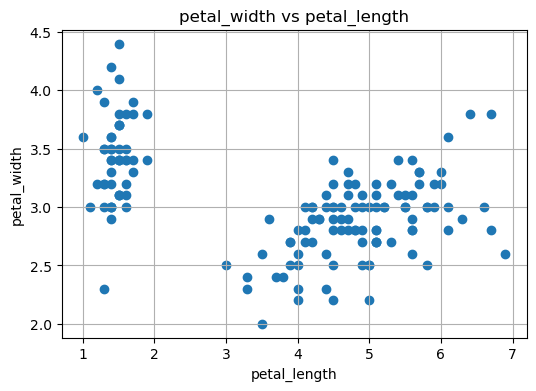

In [54]:
# Gráfica de dispersión de  petal_width vs petal_length
plt.figure(figsize=(6,4))
plt.scatter(iris['petal_length'],iris['sepal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_width vs petal_length')
plt.grid()

In [52]:
cov_mat = iris.cov()
cov_mat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [53]:
#La covarianza entre petal_length y sepal_width es negativa; la relación lineal entre las variables es inversa.
cov_mat.loc["petal_length", "sepal_width"] 

-0.3296563758389263

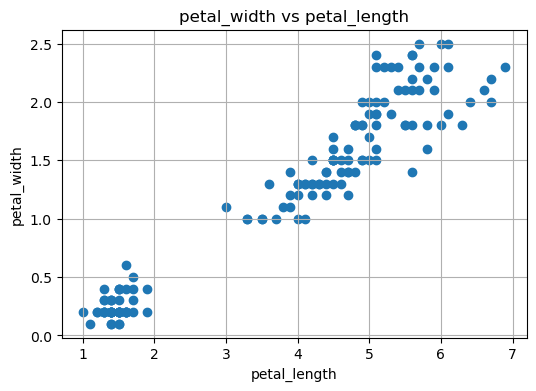

In [56]:
# Gráfica de dispersión de  petal_width vs petal_length
plt.figure(figsize=(6,4))
plt.scatter(iris['petal_length'],iris['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_width vs petal_length')
plt.grid()

In [55]:
cov_mat.loc["petal_length", "petal_width"]

1.2956093959731547

#### Propiedades de la covarianza
Dada una muestra $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$, se cumplen las siguientes propiedades relacionadas con la covarianza $\mathrm{Cov}(X, Y)$:

1. Si transformamos linealmente las variables originales $\hat{X}=a+bX$, $\hat{Y}=c+dY$, la covarianza $\mathrm{Cov}(\hat{X}, \hat{Y})$ es la covarianza original multiplicada por $bd$. Las constantes que se suman no alteran el resultado $\mathrm{Cov}(\hat{X}, \hat{Y}) = bd\mathrm{Cov}(X, Y)$.


In [57]:
iris["petal_length_transform"] = 5 + 2*iris["petal_length"] # X1 = 5 + 2*X, a=5, b=2
iris["petal_width_transform"] = 3 - 4*iris["petal_width"]   # Y1 = 5 + 2*Y, c=3, d=-4

cov_mat = iris.cov()
cov_mat


,sepal_length,sepal_width,petal_length,petal_width,petal_length_transform,petal_width_transform
sepal_length,0.685694,-0.042434,1.274315,0.516271,2.548631,-2.065083
sepal_width,-0.042434,0.189979,-0.329656,-0.121639,-0.659313,0.486557
petal_length,1.274315,-0.329656,3.116278,1.295609,6.232556,-5.182438
petal_width,0.516271,-0.121639,1.295609,0.581006,2.591219,-2.324025
petal_length_transform,2.548631,-0.659313,6.232556,2.591219,12.465111,-10.364875
petal_width_transform,-2.065083,0.486557,-5.182438,-2.324025,-10.364875,9.296100


In [58]:
cov_mat.loc["petal_length", "petal_width"]

1.2956093959731547

In [59]:
cov_mat.loc["petal_length_transform", "petal_width_transform"], 2*(-4)*cov_mat.loc["petal_length", "petal_width"]

(-10.364875167785238, -10.364875167785238)

2. La covarianza de una variable consigo misma es la varianza de la variable: $\mathrm{Cov}(X, X) = \mathrm{Cov}^2(X) $ 

In [60]:
iris["petal_length"].var()

3.1162778523489942

In [61]:
cov_mat.loc["petal_length", "petal_length"]

3.1162778523489933

3. La covarianza entre $X$ e $Y$ es igual a la covarianza entre $Y$ y $X$:  $\mathrm{Cov}(X, Y) = \mathrm{Cov}(Y, X) $ 

In [ ]:
cov_mat.loc["petal_length", "petal_width"] == cov_mat.loc["petal_width", "petal_length"]

4. La covarianza puede calcularse también de la siguiente manera: $\mathrm{Cov}(X, Y)= \frac{\sum_{i=1}^n x_iy_i}{n-1} - \frac{n}{n-1}\bar{X}\bar{Y}$

In [62]:
def cov_alterna(x, y): #En ocasiones, esta formulación es más sencilla de calcular que la de la definición, incluso para las computadoras.
  n = len(x)
  return ((x * y).sum() / (n - 1)) - ((n / (n - 1)) * x.mean() * y.mean())

cov_mat.loc["petal_length", "petal_width"]

1.2956093959731547

In [63]:
cov_alterna(iris["petal_length"], iris["petal_width"])

1.2956093959731527

## Correlación

Aunque la covarianza nos da el signo de la relación entre dos variables, al depender de las unidades de $X$ y de $Y$, no sabemos si un valor es alto o bajo; sólo sabemos el signo. Para solucionar esto, estandarizamos los valores.

Dada una muestra $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$, calculamos la correlación entre $X$ e $Y$, y la denotamos por $r(X,Y)$ al cociente de la covarianza dividida entre el producto de las desviaciones estándar.


$$ r(X,Y) = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y} $$

Donde:
- $\mathrm{Cov}(X, Y)$ es la covarianza entre $X$ y $Y$.
- $\sigma_X, \sigma_Y$ son las desviaciones estándar de $X$ y $Y$.

Este estadístico, también conocido como Coeficiente de correlación de Pearson se encuentra entre -1 y 1.

> $r(X,Y) = 1$: correlación positiva perfecta.

> $r(X,Y) = -1$: correlación negativa perfecta.

> $r(X,Y) = 0$: no hay relación lineal.

La correlación es adimensional y permite comparar relaciones entre variables de diferentes unidades.

Cuando una variable es una transformación lineal de otra, la correlación es perfecta. Por ejemplo, si tenemos dos variables, una que mide distancia recorrida en cierto tiempo y otra que mide velocidad (asumiendo que la velocidad es constante en ese mismo tiempo), el coeficiente de correlación será 1.

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_length_transform,petal_width_transform
0,5.1,3.5,1.4,0.2,7.8,2.2
1,4.9,3.0,1.4,0.2,7.8,2.2
2,4.7,3.2,1.3,0.2,7.6,2.2
3,4.6,3.1,1.5,0.2,8.0,2.2
4,5.0,3.6,1.4,0.2,7.8,2.2


In [65]:
corr_mat = iris.corr()
corr_mat

,sepal_length,sepal_width,petal_length,petal_width,petal_length_transform,petal_width_transform
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.871754,-0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.428440,0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865,1.000000,-0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000,0.962865,-1.000000
petal_length_transform,0.871754,-0.428440,1.000000,0.962865,1.000000,-0.962865
petal_width_transform,-0.817941,0.366126,-0.962865,-1.000000,-0.962865,1.000000


#### Propiedades de la correlación
Dada una muestra $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$, se cumplen las siguientes propiedades relacionadas con la correlación $r(X, Y)$:

1. Si transformamos linealmente las variables originales $\hat{X}=a+bX$, $\hat{Y}=c+dY$, la correlación $r(\hat{X}, \hat{Y})$ es la correlación original multiplicada por el signo de $bd$ para cualquier $b\neq 0,, d\neq 0$.  $$r(\hat{X}, \hat{Y}) = \frac{bd}{|bd|} r(X, Y)$$


In [66]:
iris["petal_length_transform"] = 5 + 2*iris["petal_length"]
iris["petal_width_transform"] = 3 - 4*iris["petal_width"]

corr_mat = iris.corr()
corr_mat.loc["petal_length", "petal_width"]

0.962865431402796

In [67]:
 corr_mat.loc["petal_length", "petal_width"]*((2*-4)/(abs(2*-4)))

-0.962865431402796

In [68]:
corr_mat.loc["petal_length_transform", "petal_width_transform"]

-0.9628654314027958

2. La correlación de una variable consigo misma es 1

In [69]:
corr_mat.loc["petal_length", "petal_length"]

1.0

3. La correlación entre $X$ e $Y$ es igual a la correlación entre $Y$ y $X$

In [70]:
corr_mat.loc["petal_length", "petal_width"]

0.962865431402796

In [71]:
corr_mat.loc["petal_width", "petal_length"]

0.962865431402796

¿Qué valor tendría la correlación entre X y −X?

$$Y = -X$$
$$r(X, Y) =  ?$$

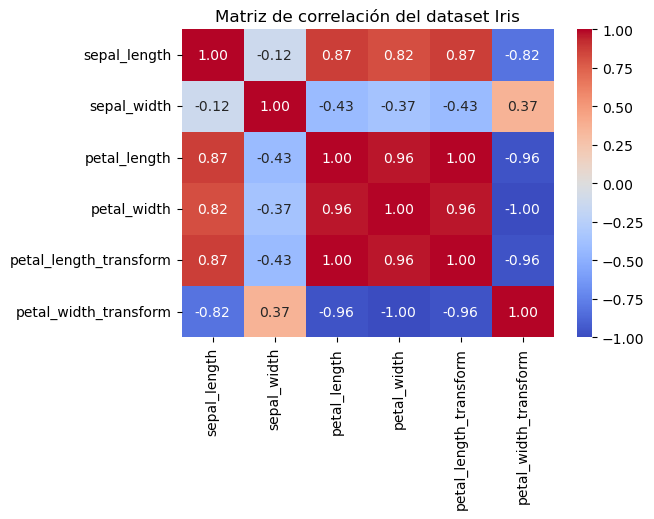

In [72]:
corr = iris.corr(numeric_only=True)

# Graficar el mapa de calor de correlaciones
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación del dataset Iris')
plt.show()

# ¿Cómo se ven las correlaciones?

In [73]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [74]:
wine_corr = df.corr()
wine_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [75]:
print(LW.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## Relación entre `flavanoids` y `ash`

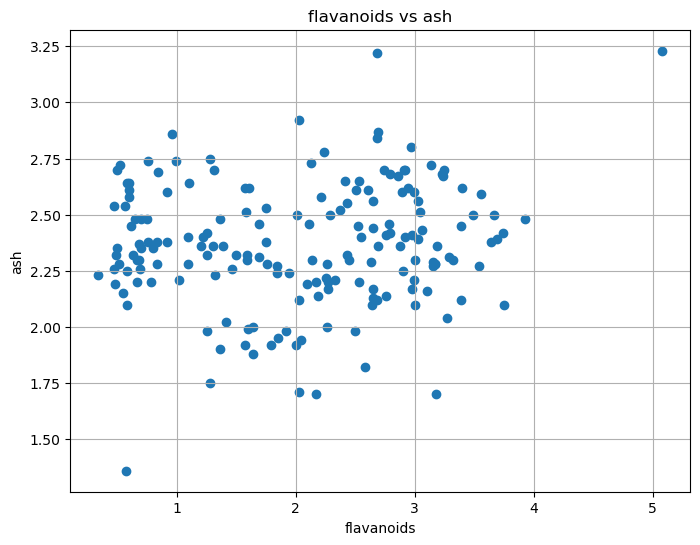

In [76]:
# Gráfica flavanoids vs ash
plt.figure(figsize=(8,6))
plt.scatter(df['flavanoids'],df['ash'])
plt.xlabel('flavanoids')
plt.ylabel('ash')
plt.title('flavanoids vs ash')
plt.grid()

## Relación entre `alcalinity_of_ash` y `ash`

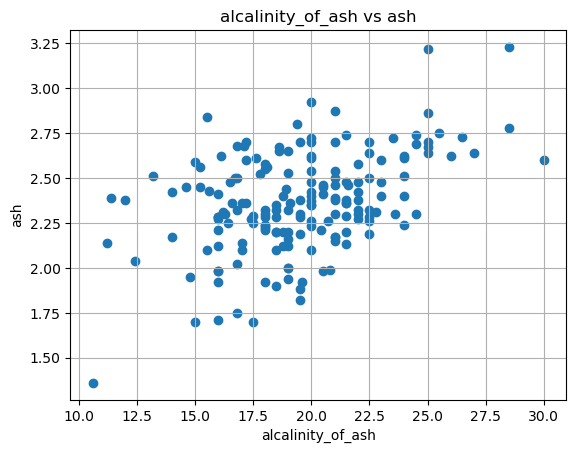

In [77]:
# Gráfica alcalinity_of_ash vs ash
plt.scatter(df['alcalinity_of_ash'],df['ash'])
plt.xlabel('alcalinity_of_ash')
plt.ylabel('ash')
plt.title('alcalinity_of_ash vs ash')
plt.grid()

#### Relación lineal

Encontrar la mejor función lineal que relacione a las variables

In [ ]:
minimize?

In [79]:
# Definimos 'fun', el criterio de minimizacion
#
# ash=a[0]+a[1]*flavanoids
# y = mx + b 
# y = AX  ---->  [a0,a1]*[1, x]
def fun(a,x,y):
    f=a[0]+a[1]*x
    return np.mean((f-y)**2)

In [80]:
a0=np.random.rand(2) # Dos elementos uniformemente distrubuidos entre 0 y 1
sol=minimize(fun,a0,args=(df.flavanoids,df.ash))
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.07385068677098952
        x: [ 2.302e+00  3.161e-02]
      nit: 3
      jac: [ 0.000e+00  1.118e-08]
 hess_inv: [[ 2.575e+00 -1.023e+00]
            [-1.023e+00  5.040e-01]]
     nfev: 15
     njev: 5

In [84]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized.

            ``fun(x, *args) -> float``

        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of

            - 'Nelder-Mead' :ref:`(see here) <optimize.mi

---
La ecuación óptima que relaciona `flavanoids` y `ash` es 
$$
ash=2.3+0.0316\;flavanoids,
$$
con un $mse=0.07385$.

In [85]:
sol.x

array([2.30237809, 0.03160682])

In [86]:
fun(sol.x,df.flavanoids,df.ash)

0.07385068677098952

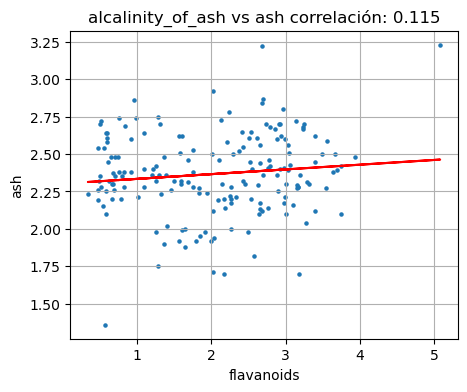

In [87]:
# Flavanoids vs ash

x=df.flavanoids
a=sol.x
f_fl_ash=a[0]+a[1]*x #ecuación de la recta
plt.figure(figsize=(5,4))
plt.scatter(df.flavanoids,df.ash,s=5) # s=size
plt.plot(x,f_fl_ash,'r') # 'r'=red
plt.xlabel('flavanoids')
plt.ylabel('ash')
plt.title(f'alcalinity_of_ash vs ash correlación: {np.round(wine_corr.loc['flavanoids', 'ash'],3)}')
plt.grid() # Cuadrícula de fondo

In [88]:
# Función lineal que relaciona Ash vs su alcalinidad
#
# Usamos la misma función 'fun' (criterio de optimización) y las mismas condiciones iniciales 'a0'
sol2=minimize(fun,a0,args=(df.alcalinity_of_ash,df.ash))
sol2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.06012981364539251
        x: [ 1.656e+00  3.642e-02]
      nit: 5
      jac: [ 6.519e-09  1.532e-07]
 hess_inv: [[ 1.763e+01 -8.789e-01]
            [-8.789e-01  4.508e-02]]
     nfev: 21
     njev: 7

---
La ecuación óptima que relaciona `alcalinity_of_ash` con `ash` es
$$
ash=1.656+0.0364\;alcalinity\_of\_ash,
$$
con un $mse=0.06013$.

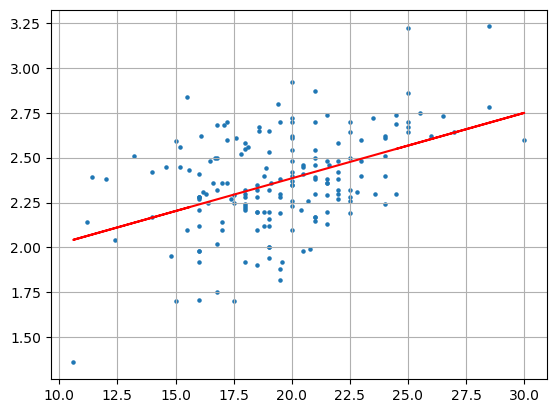

In [89]:
a=sol2.x
x=df.alcalinity_of_ash
f=a[0]+a[1]*x
plt.scatter(x,df.ash,s=5)
plt.plot(x,f,'r')
plt.grid()

In [90]:
wine_corr.loc['alcalinity_of_ash', 'ash']

0.44336718655231105

## Relación lineal usando Librerías

In [ ]:
from sklearn.linear_model import LinearRegression

In [91]:
lin = LinearRegression()

In [92]:
df['flavanoids'].values.shape

(178,)

In [93]:
df['flavanoids'].shape

(178,)

In [94]:
df[[ 'flavanoids']].shape

(178, 1)

In [95]:
lin.fit(df[[ 'flavanoids']].values,df['ash'])

LinearRegression()

In [96]:
lin.coef_

array([0.03160684])

In [97]:
lin.intercept_

2.3023780616508027

In [98]:
# y = coef_+x +intercept
f_linprog= lin.predict(df[[ 'flavanoids']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


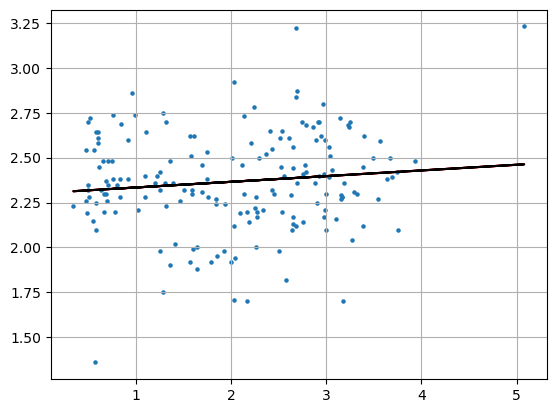

In [99]:
plt.scatter(df.flavanoids,df.ash,s=5) # s=size
x=df.flavanoids
#a=sol.x
#f_m=a[0]+a[1]*x #ecuación de la recta
plt.plot(x,f_fl_ash,'r') # 'r'=red
plt.plot(x,f_linprog,'k') # 'r'=black
plt.grid() # Cuadrícula de fondo

Es importante resaltar que la covarianza y el coeficiente de correlación no detectan relaciones no lineales entre las variables. Por ejemplo, si la relación entre $X$ e $Y$ es cuadrática (o polinímica de mayor órden), logarítmica, exponencial, etc., podríamos tener un coeficiente de correlación cercano a 0, pero esto no significaría que no hay relación entre $X$ e $Y$, sólo significa que no hay relación lineal entre estas variables.